In [1]:
import pandas as pd

In [2]:
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [4]:
# 불러올 종가의 목록 입니다.
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [5]:
# stock_dict 변수의 타입을 봅니다.
type(stock_dict)

dict

In [6]:
# dict 는 key:value 구조 입니다. key만 봅니다.
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [9]:
# dict 는 key:value 구조 입니다. value만 봅니다.
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [14]:
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []
for sd in stock_dict:
    print(sd, stock_dict[sd])
    item_list.append(sd)

삼성전자 005930
SK하이닉스 000660
현대차 005380
셀트리온 068270
LG화학 051910
POSCO 005490
삼성물산 028260
NAVER 035420


In [15]:
# 반복문을 사용하여 일별시세별 종가를 수집합니다.
item_list = []
for sd in stock_dict:
    close = fdr.DataReader(stock_dict[sd], "2021")["Close"]
    item_list.append(close)
    
item_list

[Date
 2021-01-04    83000
 2021-01-05    83900
 2021-01-06    82200
 2021-01-07    82900
 2021-01-08    88800
               ...  
 2021-07-21    78500
 2021-07-22    79700
 2021-07-23    79300
 2021-07-26    78800
 2021-07-27    79000
 Name: Close, Length: 142, dtype: int64,
 Date
 2021-01-04    126000
 2021-01-05    130500
 2021-01-06    131000
 2021-01-07    134500
 2021-01-08    138000
                ...  
 2021-07-21    117000
 2021-07-22    119500
 2021-07-23    118500
 2021-07-26    117000
 2021-07-27    117500
 Name: Close, Length: 142, dtype: int64,
 Date
 2021-01-04    207500
 2021-01-05    209500
 2021-01-06    203000
 2021-01-07    206000
 2021-01-08    246000
                ...  
 2021-07-21    228000
 2021-07-22    228500
 2021-07-23    225500
 2021-07-26    224500
 2021-07-27    224500
 Name: Close, Length: 142, dtype: int64,
 Date
 2021-01-04    347500
 2021-01-05    354500
 2021-01-06    353500
 2021-01-07    357500
 2021-01-08    367000
                ...  
 2021-

In [16]:
len(item_list)

8

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [19]:
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [20]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# 이 때, 컬럼은 stock_dict 의 key 값을 사용합니다.
df = pd.concat(item_list, axis = 1)
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,83000,126000,207500,347500,889000,273000,144000,293000
2021-01-05,83900,130500,209500,354500,893000,285000,144500,292500
2021-01-06,82200,131000,203000,353500,890000,280000,139500,290000
2021-01-07,82900,134500,206000,357500,962000,291000,145000,289500
2021-01-08,88800,138000,246000,367000,999000,294500,151000,312000
...,...,...,...,...,...,...,...,...
2021-07-21,78500,117000,228000,267500,810000,330500,136500,428000
2021-07-22,79700,119500,228500,269500,826000,346000,137500,440000
2021-07-23,79300,118500,225500,268500,828000,353500,137500,452000


### 시각화를 위한 폰트 설정

In [21]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

<AxesSubplot:title={'center':'한글'}>

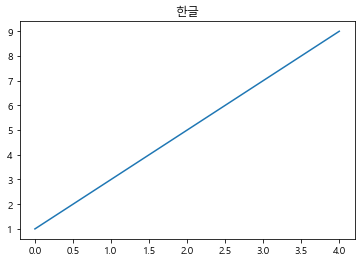

In [27]:
pd.Series([1,3,5,7,9]).plot(title='한글')

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [37]:

# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당

font_family = family =get_font_family()

# 그래프 스타일 설정
plt.style.use('classic')

# 폰트설정
plt.rc("font", family =get_font_family())

# 마이너스폰트 설정

plt.rc("axes",unicode_minus=False)  #unicode_minus는 기본이 True여서 False로 하는 거임 


# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats("retina")  #svg

<AxesSubplot:title={'center':'한글'}>

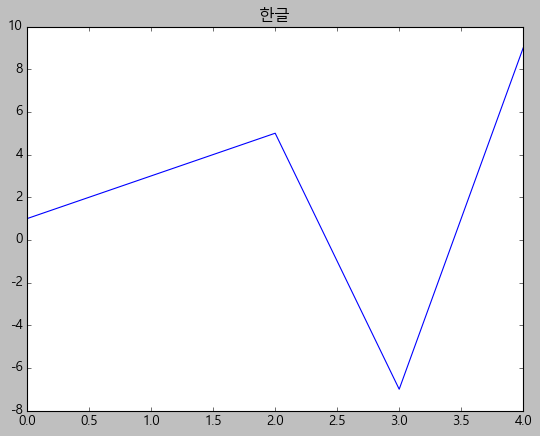

In [36]:
pd.Series([1,3,5,-7,9]).plot(title='한글')

## 여러 종목 한번에 시각화 하기

<AxesSubplot:xlabel='Date'>

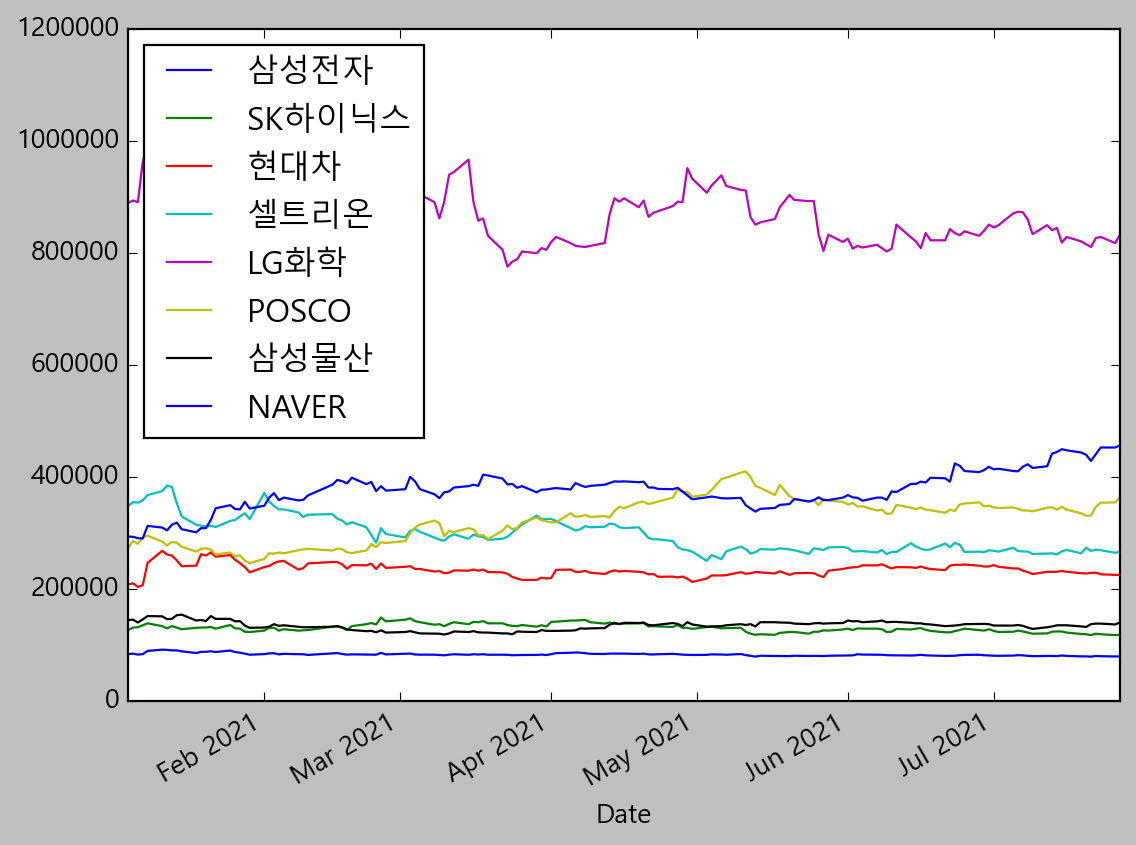

In [42]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot()

<AxesSubplot:xlabel='Date'>

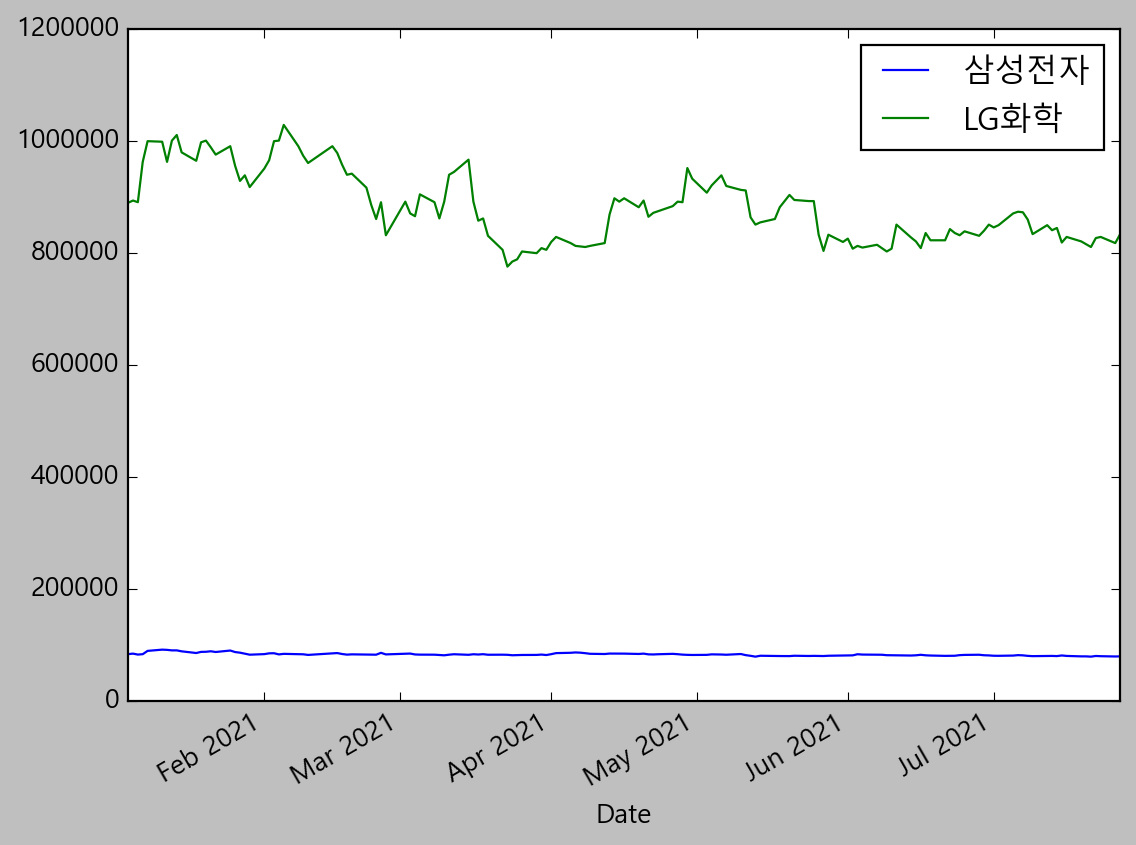

In [44]:
# 2개의 종목 비교하기 : "삼성전자", "LG화학" 을 plot으로 시각화 합니다.   #두개 차이가 많이 나서 한번 해봄
df[['삼성전자','LG화학']].plot()

## 2축 그래프 사용하기

<AxesSubplot:xlabel='Date'>

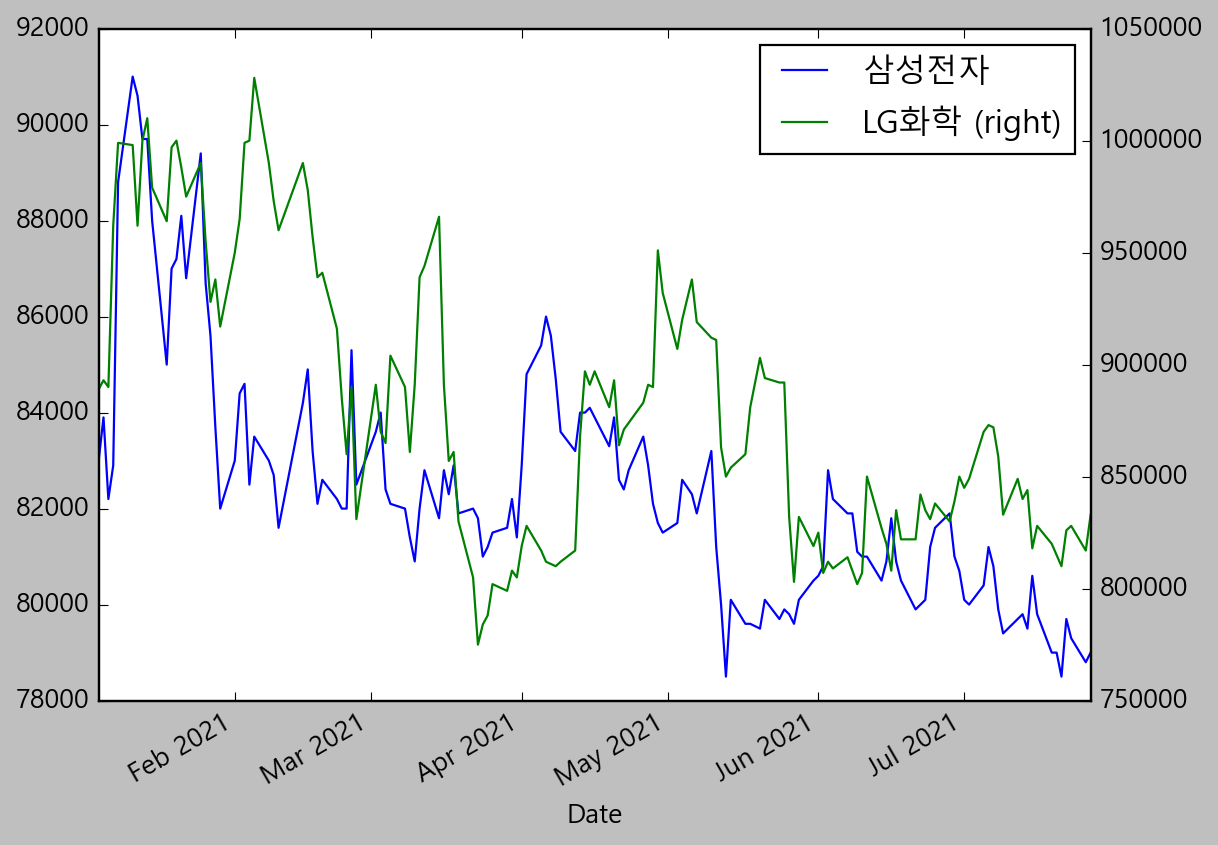

In [45]:
# secondary_y를 사용해 2축 그래프 그리기
df[['삼성전자','LG화학']].plot(secondary_y = 'LG화학')

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)
        

### 2020년 1월에 우리가 사서 7월인 지금까지 가지고 있다고 가정하고 분석을 해보자!

In [55]:
# df2 변수에 'LG화학', '삼성전자' 만 따로 가져옵니다.
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.


# df[['LG화학', '삼성전자']]
df2 = df[['LG화학', '삼성전자']]
# df2.iloc[0] # 첫번째 날 가격

#수익률 구하기 
df_plot = df2/ df2.iloc[0] -1

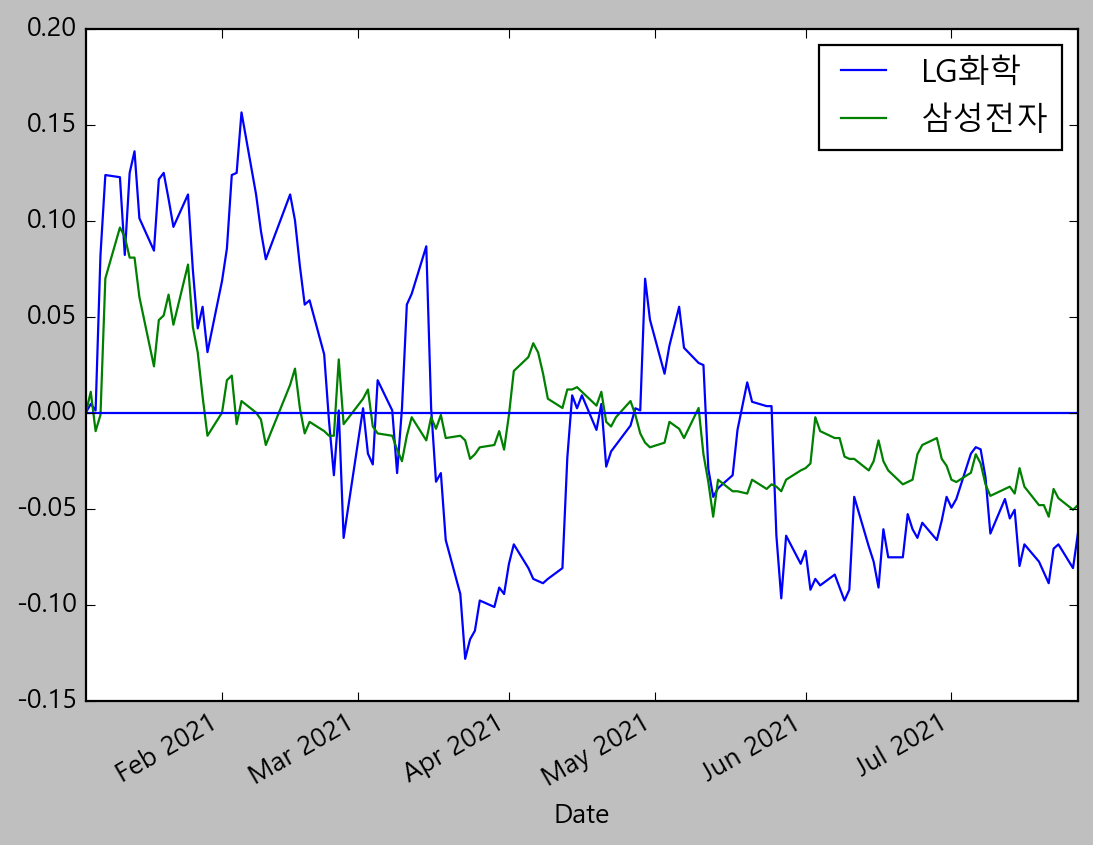

In [57]:
# 수익률 시각화 하기
df_plot.plot()
plt.axhline(0)

## pyplot의 subplots 로 서브플롯 그리기

<AxesSubplot:xlabel='Date'>

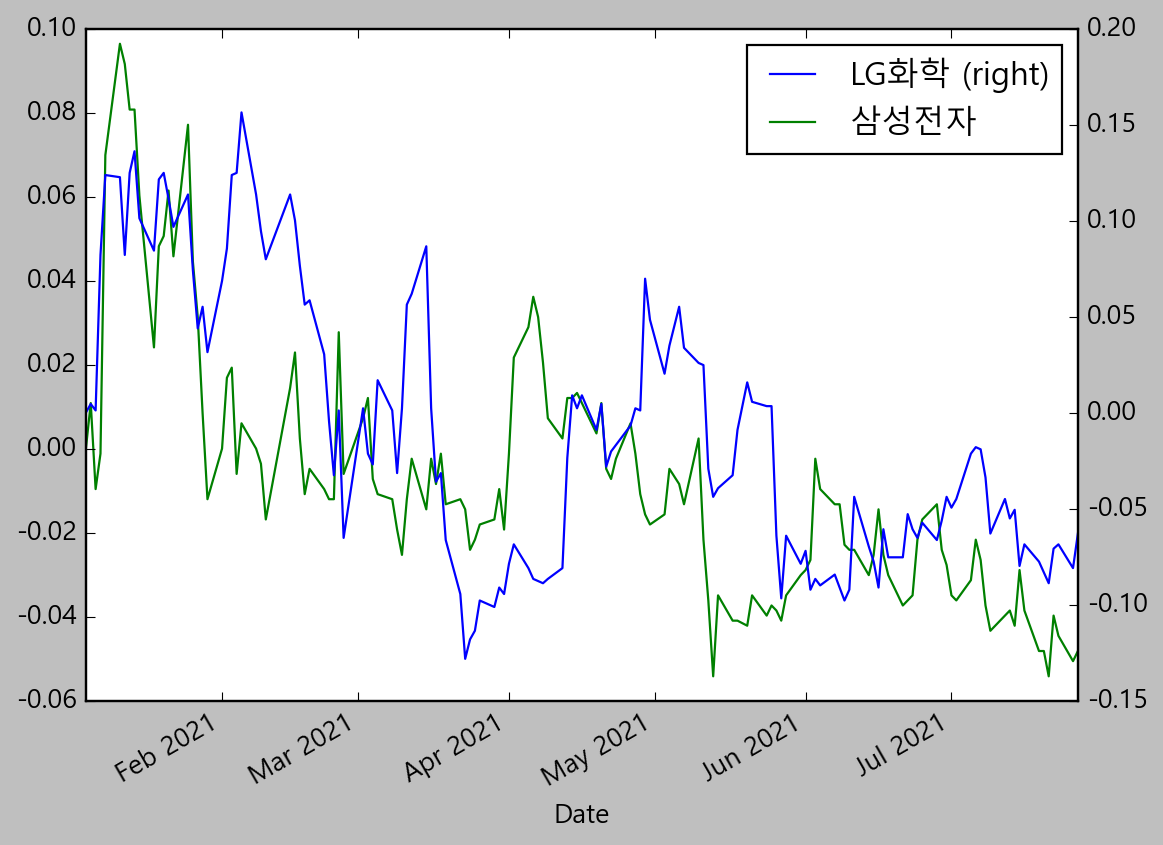

In [60]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.

df_plot.plot(secondary_y = 'LG화학')

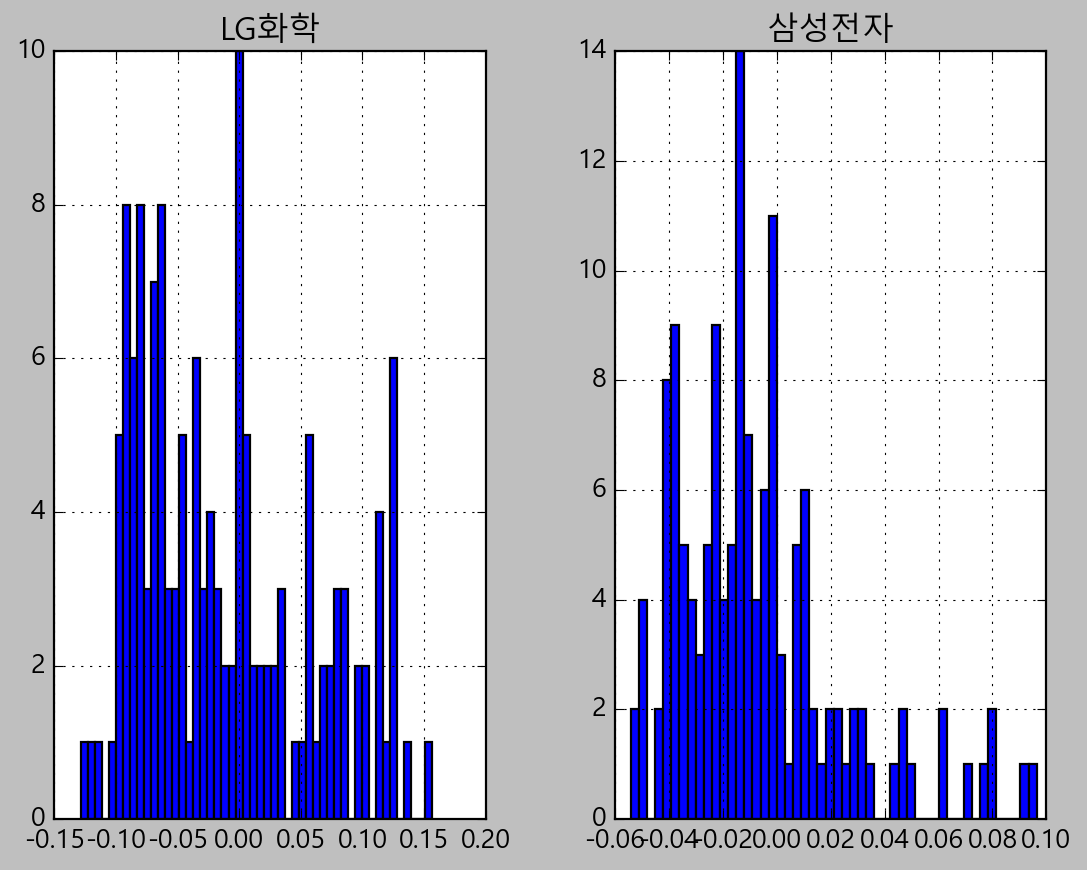

In [61]:
# df_plot 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
_ = df_plot.hist(bins =50)

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [70]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
df_norm = df / df.iloc[0] -1
df_norm.head()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,0.035714,0.009639,0.020144,0.004499,0.043956,0.003472,-0.001706
2021-01-06,-0.009639,0.039683,-0.021687,0.017266,0.001125,0.025641,-0.031250,-0.010239
2021-01-07,-0.001205,0.067460,-0.007229,0.028777,0.082115,0.065934,0.006944,-0.011945
2021-01-08,0.069880,0.095238,0.185542,0.056115,0.123735,0.078755,0.048611,0.064846


### 전체 종목의 수익률 시각화

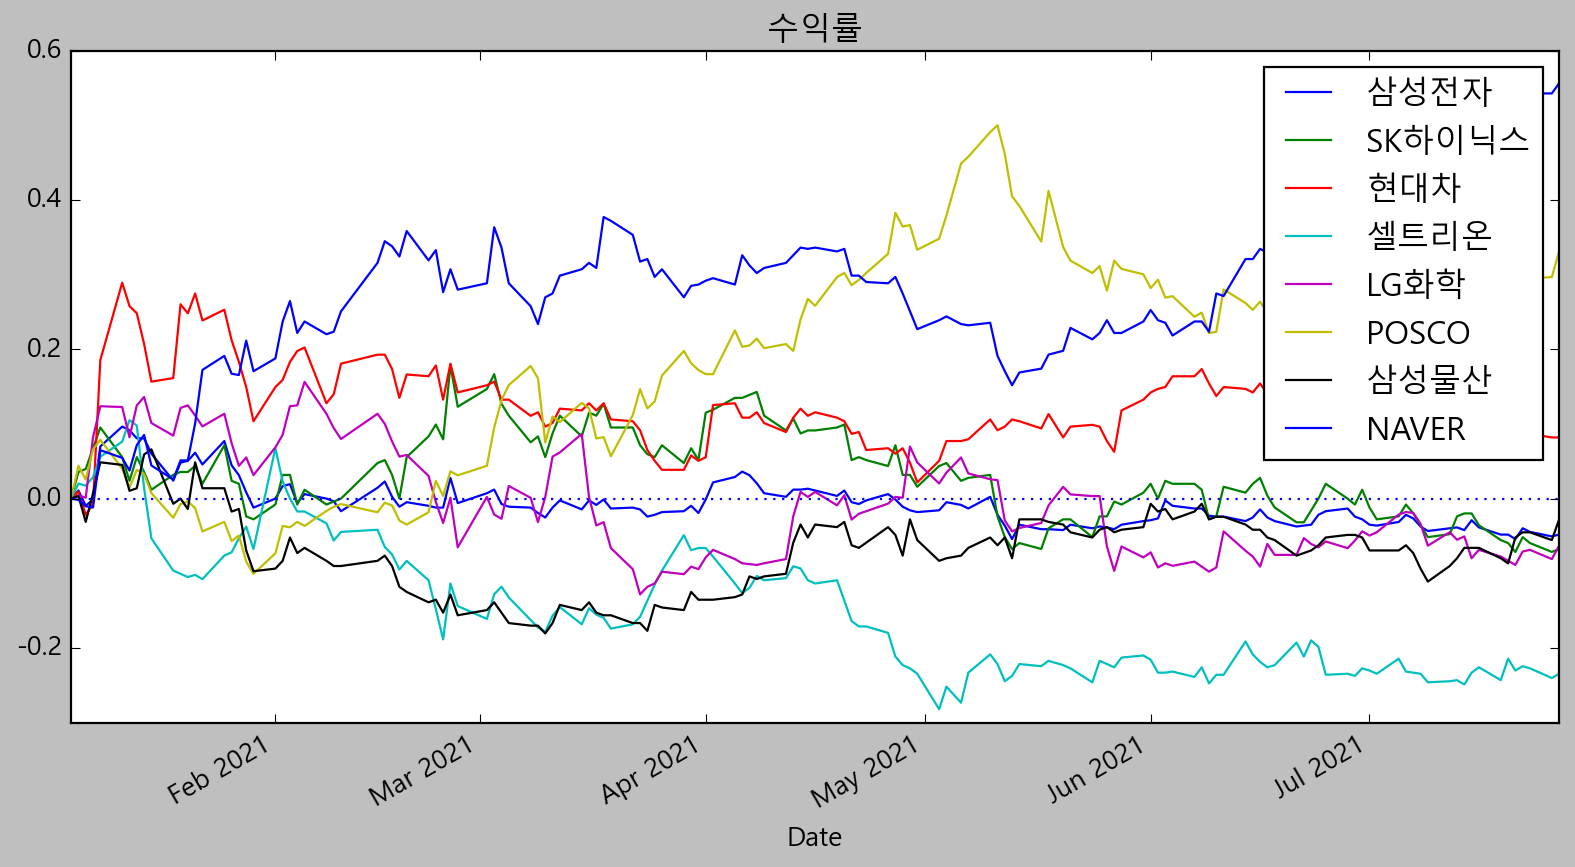

In [75]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(12,6), title ='수익률')
plt.axhline(0, c="b", linestyle=":") #linestyle="--"  점선


#Output: 해석
#처음에 Naver를 샀으면 수익이 났고, 삼성전자를 샀으면 손해를 봤음

In [76]:
#subplot으로 보는게 나을 듯 
df_norm.plot(figsize=(12,6), title ='수익률', subplot())
plt.axhline(0, c="b", linestyle=":") #linestyle="--"  점선

SyntaxError: positional argument follows keyword argument (<ipython-input-76-e3a51dcfb7c6>, line 2)

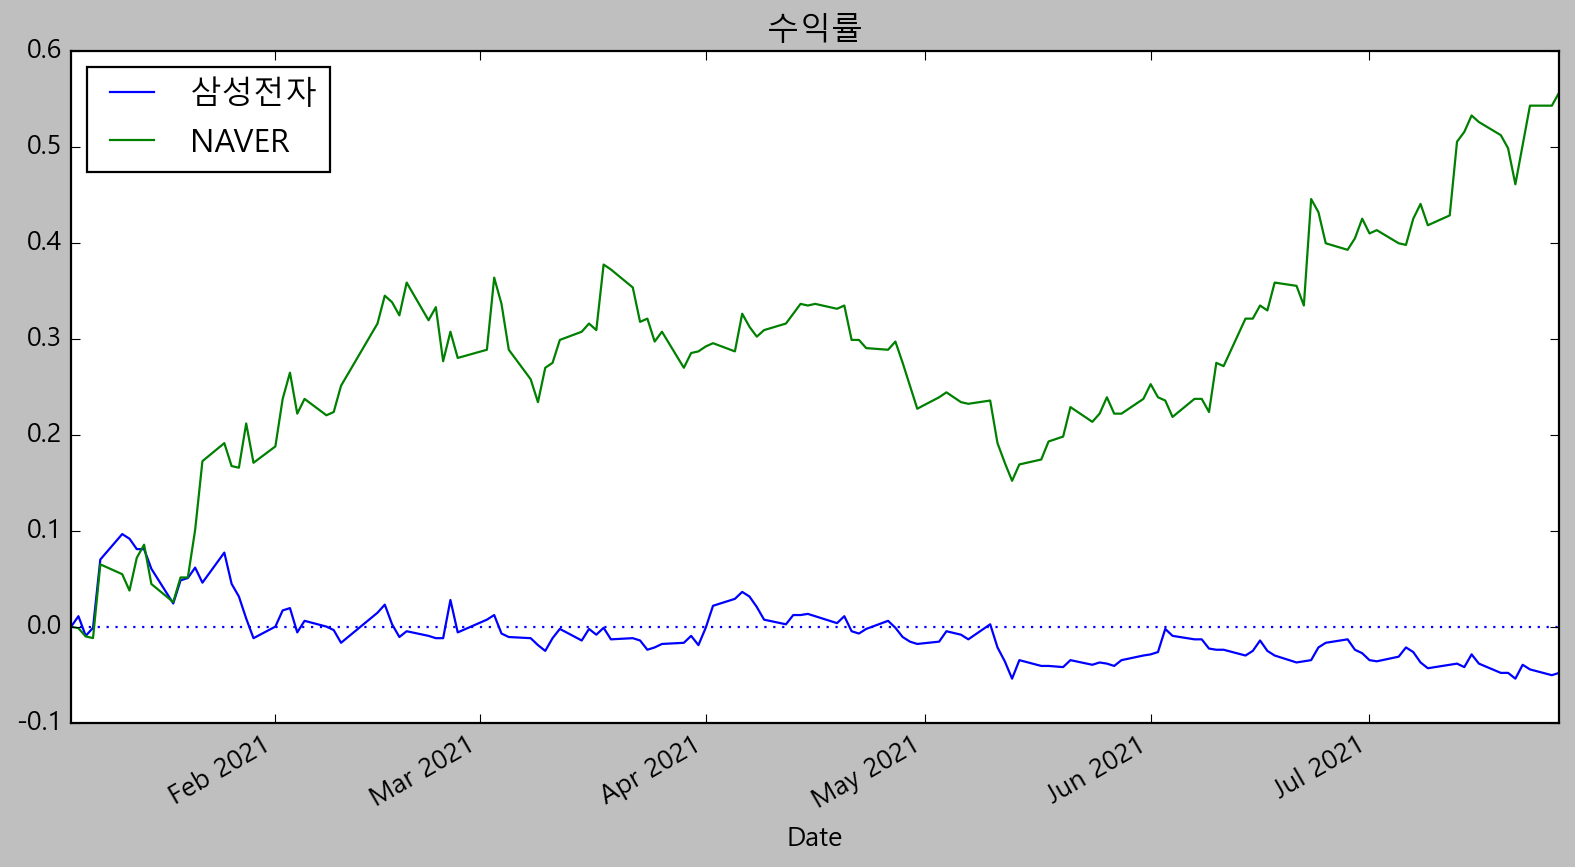

In [78]:
# 삼성전자와 NAVER 선의 색상이 헷갈리는데요 구분할 수 있는 방법이 있을까요?
#방법1 : t삼성전자와 NAVER만 나타내기 
df_norm[['삼성전자','NAVER']].plot(figsize=(12,6), title ='수익률')
plt.axhline(0, c="b", linestyle=":") #linestyle="--"  점선

<AxesSubplot:title={'center':'수익률'}, xlabel='Date'>

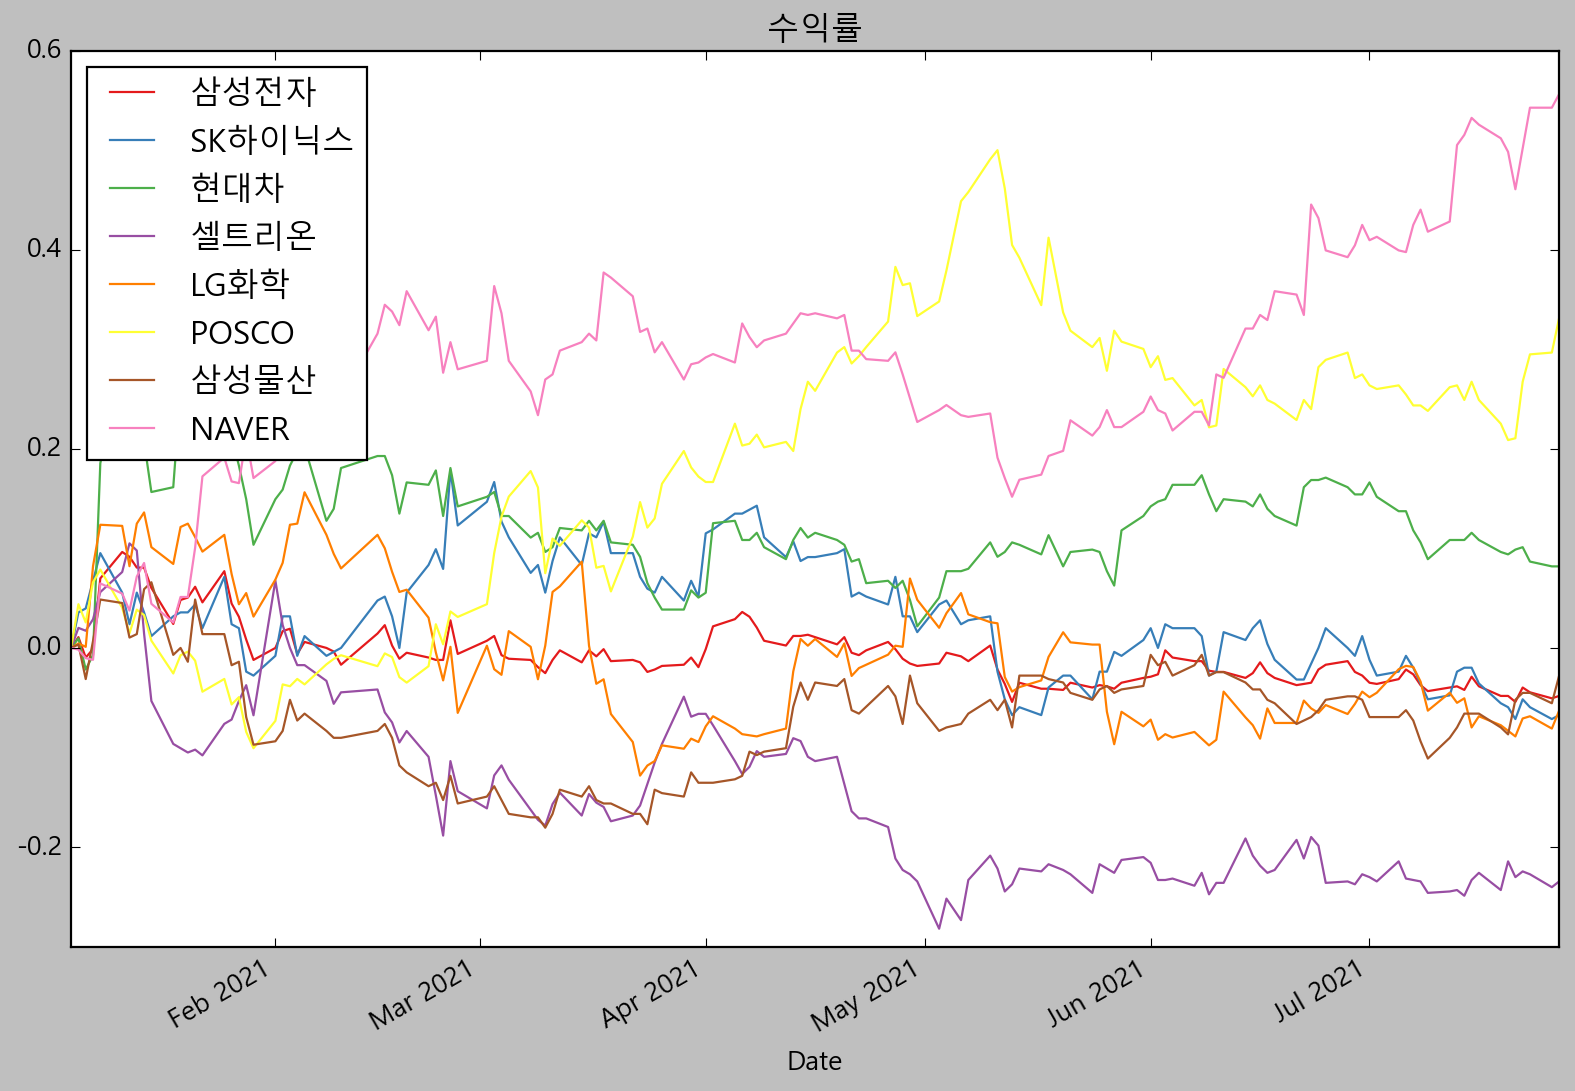

In [80]:
#방법2: 다양한 색깔 쓰기

df_norm.plot(figsize=(12, 8), title='수익률', color=plt.cm.Set1.colors)

In [87]:
# 계산된 수익률에 대한 기술통계값 구하기

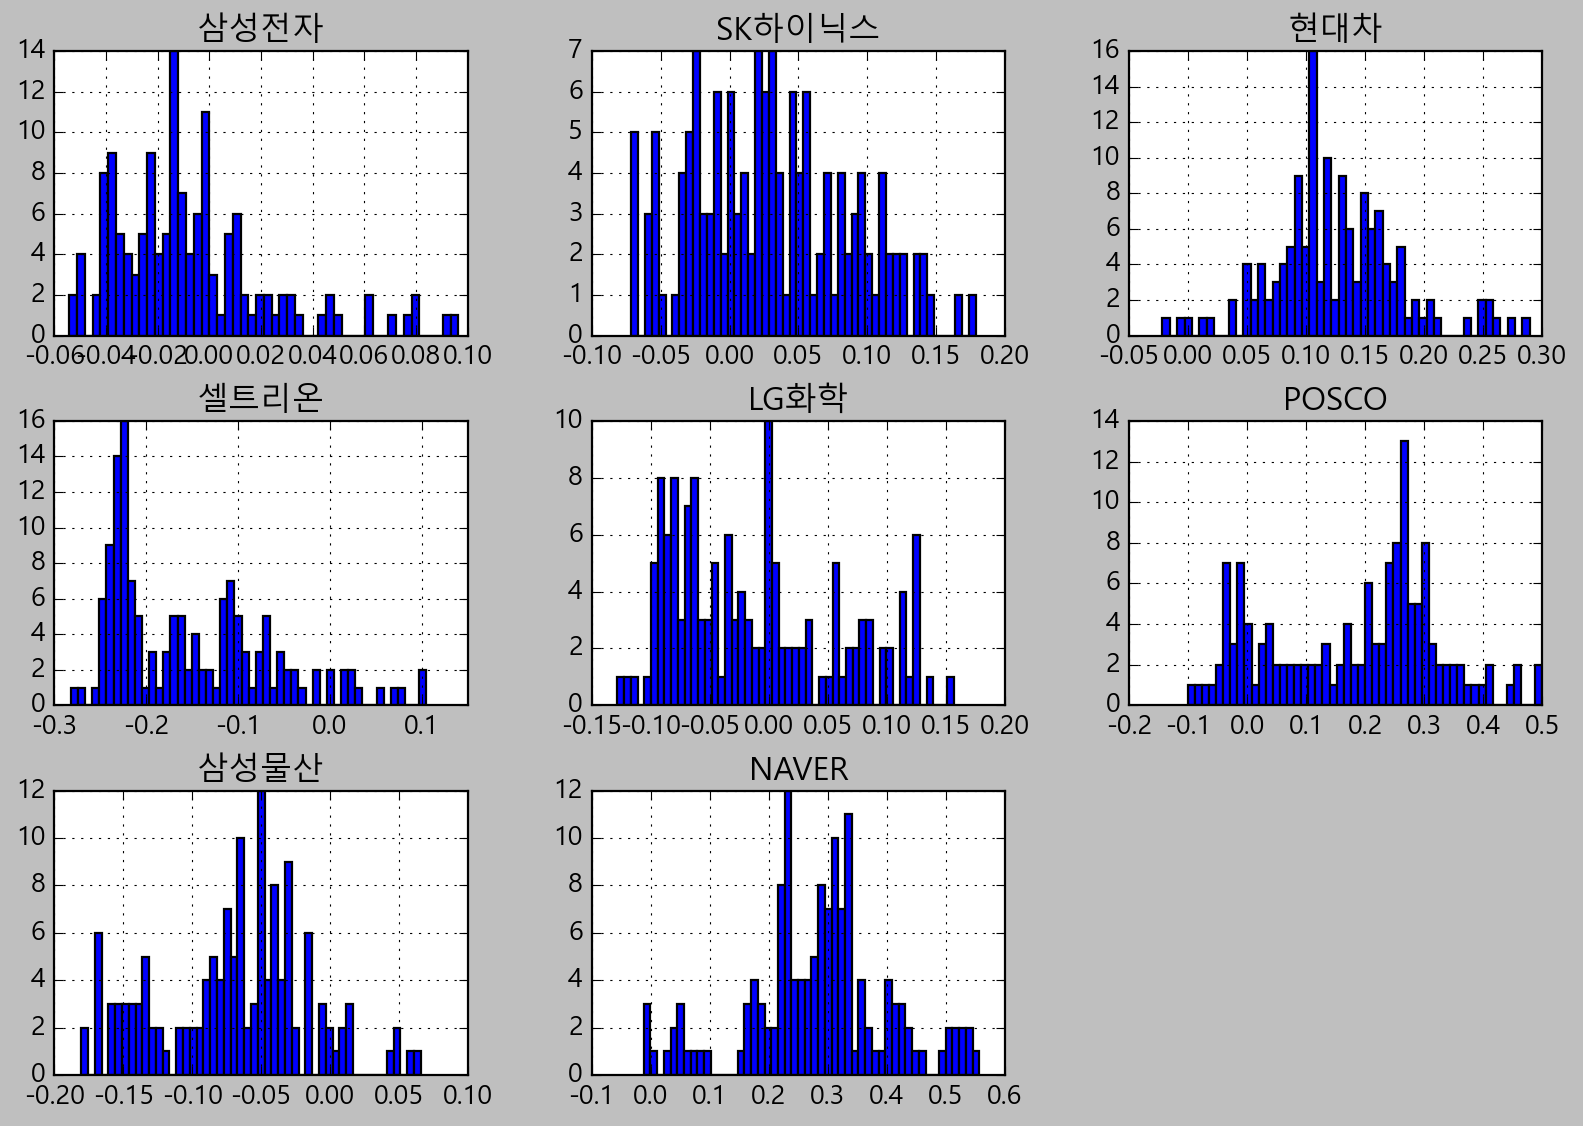

In [83]:
# 수익률에 대한 히스토그램 그리기

h = df_norm.hist(bins =50, figsize=(12,8))



#삼성전자은 수익을 봤던 날 보다 손해를 본 날이 많다.
#셀트리온은 수익을 봤던 날이 손해를 본 날 보다 많다.

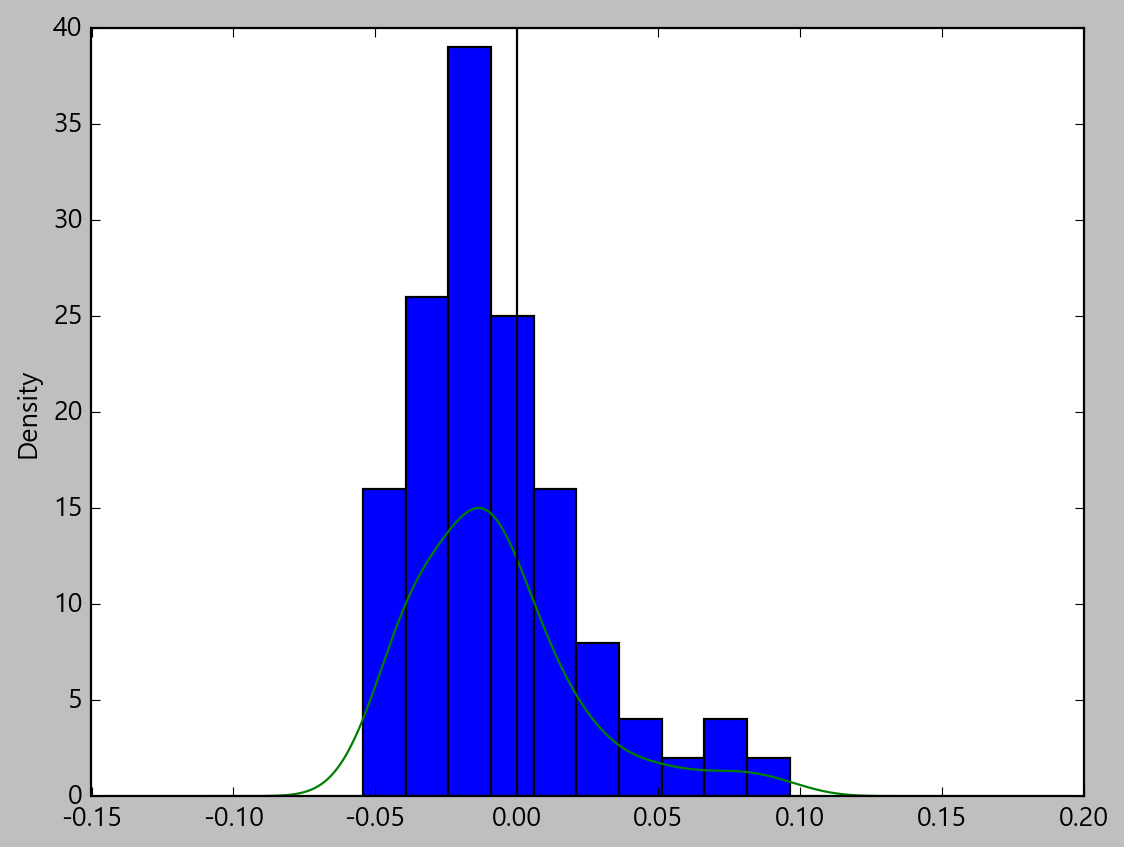

In [91]:
# [추가]0기준을 표시하고,  
df_norm["삼성전자"].plot.hist()
df_norm["삼성전자"].plot.kde()
plt.axvline(0, c = 'k')

## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)



🔔머신러닝에서는 정규분포로 나타나는 게 좋은 그래프다.

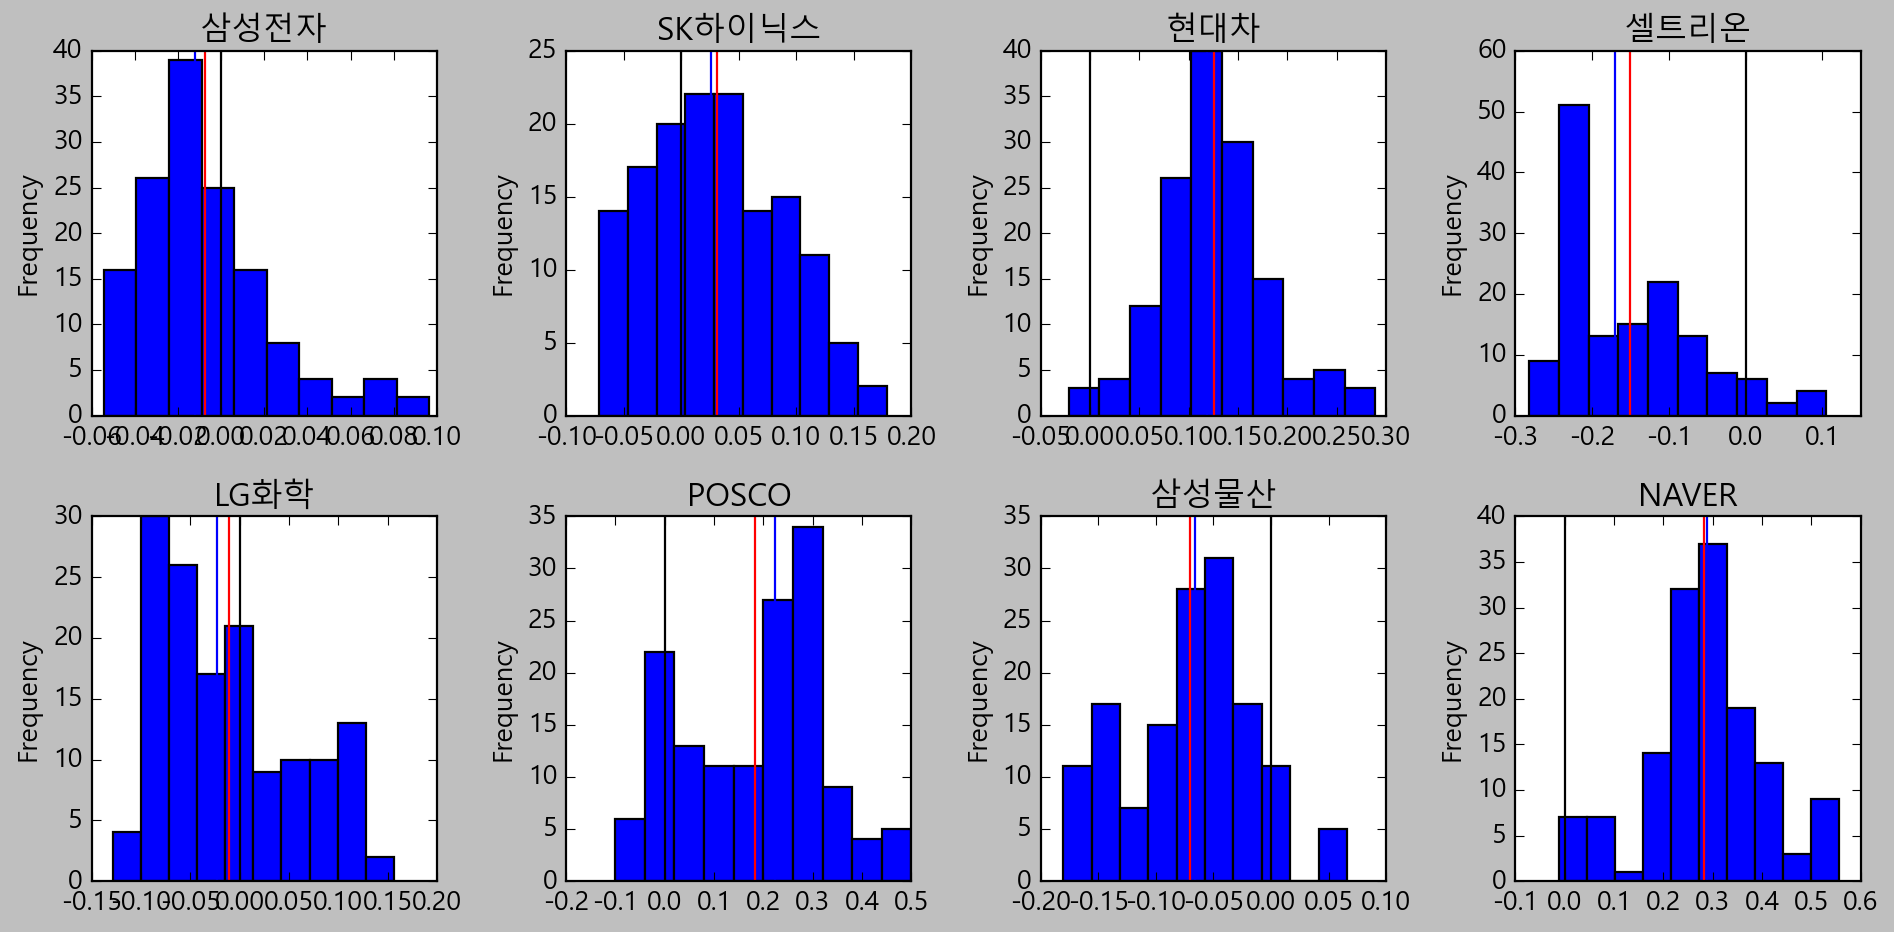

In [100]:
# skew 로 수익률의 왜도를 구합니다.


col = 4
row =2
fig,axes = plt.subplots(row,col, figsize =(12,6))
for i, sd in enumerate(stock_dict):
    col_num = i // col 
    row_num = i % col
    ax = df_norm[sd].plot.hist(ax=axes[col_num, row_num])
    ax.axvline(0, c ='k')
    ax.axvline(df_norm[sd].mean(), c='r')
    ax.axvline(df_norm[sd].median(), c='b')
    ax.set_title(sd)

plt.tight_layout()

    
    
#혹시 subplot끼리 글씨가 겹치는게 신경쓰이신 분들은 plt.tight_layout()을 이용하시면 됩니다!
    
    
# Output 설명:   
#중앙값과 평균값이 비슷하면 거의 정규분표를 그린다

### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

In [86]:
# kurt 로 첨도를 구합니다.
df_norm.kurt()

삼성전자      1.724313
SK하이닉스   -0.595950
현대차       0.897096
셀트리온     -0.000192
LG화학     -0.784126
POSCO    -0.865273
삼성물산     -0.335050
NAVER     0.397328
dtype: float64